In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. For a point moving on a circle at constant angular velocity, $\omega$, the $x$ and $y$ coordinates are given by
$$ \frac{dx}{dt} = -\omega y \quad \frac{dy}{dt} = \omega x \quad \omega = \frac{2\pi}{T}$$
Solve the above equations on the computer using a) the forward Euler scheme and b) the centred-difference scheme with a forward Euler first step. Use the following parameters: $T = 72$ hours, $\Delta t = 0.5$ hours, $x_0= x(0) = 600$ km, $y_0 = 0$. Integrate forward in time for 144 hours and plot the 𝑥,𝑦 coordinates. Comment on your results.

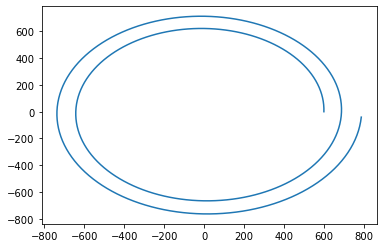

In [19]:
## Forward Euler Method
w = (2*np.pi)/72

def eulerStep (X, Y, h):
    newX = X - h*w*Y
    newY = Y + h*w*X
    return(newX, newY)

maxTurn = 144*2
Xvals,Yvals = [600],[0]
def fwdEuler (num):
    h = 0.5
    X = 600
    Y = 0
    for n in range(num-1):
        (X,Y) = eulerStep(X,Y,h)
        Xvals.append(X)
        Yvals.append(Y)
        
fwdEuler(maxTurn)
plt.plot(Xvals,Yvals)

We use a centered difference approximation for $dx/dt$ as follows:
$$ \frac{dx}{dt} \approx \frac{x_{n+1} - x_{n-1}}{2h} \implies
x_{n+1} = x_{n-1} + 2h f(x_n,y_n)$$
So we neex the two previous terms to compute the next. We'll use the forward euler method for one step to get $x_1$ and $y_1$ and from there we'll follow the centered difference scheme to compute $x_n,y_n$ for $n\geq 2$.

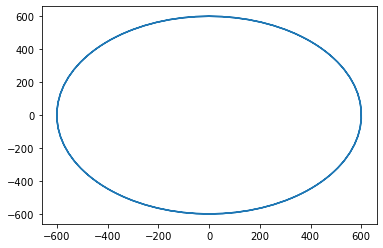

In [10]:
#Centered Difference Scheme
h = 0.5
def eulerStep2 (x1,x2,y1,y2):
    newX = x1 - w*y2
    newY = y1 + w*x2
    return (x2,newX,y2,newY)

maxTurn = 288

Xs,Ys = [],[]
def centeredDiff (turns):
    X0 = 600
    Y0 = 0
    X1,Y1 = eulerStep(X0,Y0,0.5)
    Xs,Ys = [X0,X1],[Y0,Y1]
    for n in range (turns-1):
        X0,X1,Y0,Y1 = eulerStep2(X0,X1,Y0,Y1)
        Xs.append(X1)
        Ys.append(Y1)
    return Xs,Ys

Xs,Ys = centeredDiff(maxTurn)
plt.plot(Xs,Ys) #this is actually a circle traced over twice.

One notes that the forward euler method is unstable, as further iterations yield more of a spiral outward, implying that there is some kind of external force pushing the particle out, event thought the system clearly doenst have one. In contrast, integrating with the centered difference method accurately gives the cirle we wanted, no matter for how long we iterate it. Below I plotted 1000 iterations of both schemes to further illustrate this. With forward euler (blue) we see the particle is pushed outward faster and faster, and with centered difference (orange) the particle stays on its course, the latter of the two is coherent with the model described by the differential equation.

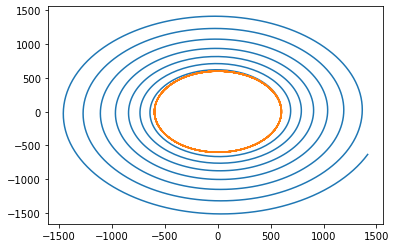

In [25]:
Xvals,Yvals = [600],[0]
fwdEuler(1000)
plt.plot(Xvals, Yvals)
X,Y = centeredDiff(1000)
plt.plot(X,Y)